In [1]:
from pyFrame import Frame
import ipywidgets as widgets

In [2]:
BedFrame = Frame.Frame()

In [3]:
#addding nodes to Frame
BedFrame.addNode('1',0,0,0)
BedFrame.addNode('2',2.2,0,0)
BedFrame.addNode('3',0,2.6,0)
BedFrame.addNode('4',2.2,2.6,0)
BedFrame.addNode('5',0,0,2)
BedFrame.addNode('6',2.2,0,2)
BedFrame.addNode('7',0,2.6,2.9)
BedFrame.addNode('8',2.2,2.6,2.9)
BedFrame.addNode('9',0,1.2,2.9)
BedFrame.addNode('10',2.2,1.2,2.9)
BedFrame.addNode('11',0,0.6,2)
BedFrame.addNode('12',2.2,0.6,2)

In [4]:
#spruce wood
E = 8*(10**9) #Pa
G = 0.577*E #Pa
J = 0
a = 0.1 #m
b = 0.1 #m
Iz = a*(b**3)/12
Iy = (b**3)*a/12
A = a*b

In [5]:
#add Members 
BedFrame.addMember('col1', '1','5', E, G, J, Iy, Iz, A)
BedFrame.addMember('col2', '2','6', E, G, J, Iy, Iz, A)
BedFrame.addMember('col3', '3','7', E, G, J, Iy, Iz, A)
BedFrame.addMember('col4', '4','8', E, G, J, Iy, Iz, A)

BedFrame.addMember('Beam1', '5','6', E, G, J, Iy, Iz, A)
BedFrame.addMember('Beam2', '7','8', E, G, J, Iy, Iz, A)
BedFrame.addMember('Beam1.5', '9','10', E, G, J, Iy, Iz, A)
BedFrame.addMember('Beam2.5', '11','12', E, G, J, Iy, Iz, A)


BedFrame.addMember('Beam3', '6','12', E, G, J, Iy, Iz, A)
BedFrame.addMember('Beam4', '5','11', E, G, J, Iy, Iz, A)

BedFrame.addMember('Beam5', '11','9', E, G, J, Iy, Iz, A)
BedFrame.addMember('Beam6', '12','10', E, G, J, Iy, Iz, A)

BedFrame.addMember('Beam7', '9','7', E, G, J, Iy, Iz, A)
BedFrame.addMember('Beam8', '10','8', E, G, J, Iy, Iz, A)

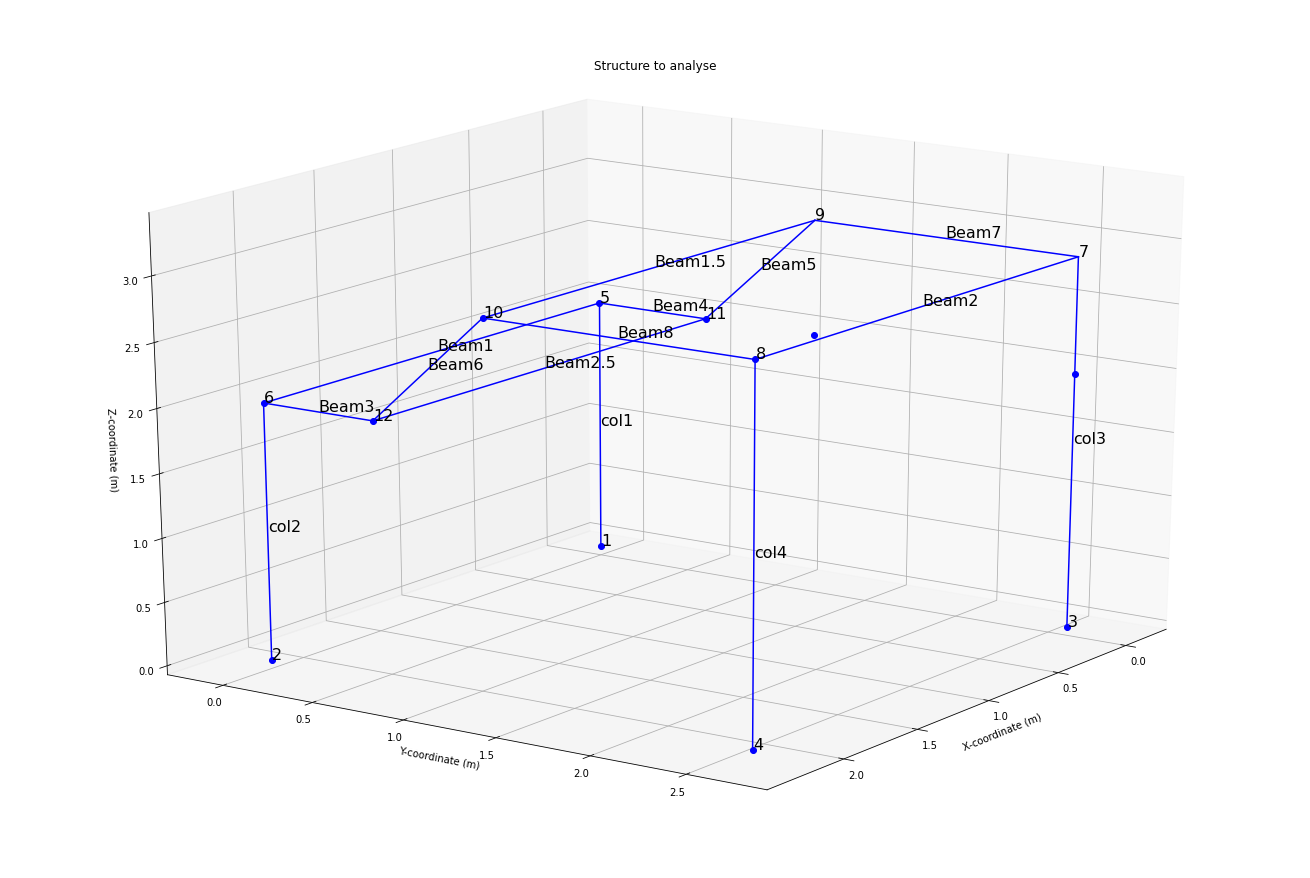

In [6]:
BedFrame.plot(deformed=False)

In [7]:
#create supports 
BedFrame.makeSupport('1', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('2', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('3', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('4', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)

In [8]:
#set nodal loads
BedFrame.addNodeLoad('5', Fy=1000,Fx=1000)

In [9]:
#set member loads
BedFrame.addMemberPtForce('Beam7', x=0.1,Fz=-2500)
BedFrame.addMemberPtForce('Beam7', x=1.3,Fz=-2500)
BedFrame.addMemberPtForce('Beam8', x=0.1,Fz=-2500)
BedFrame.addMemberPtForce('Beam8', x=1.3,Fz=-2500)

In [10]:
BedFrame.analyze()

In [11]:
#BedFrame.plot()
widgets.interact(BedFrame.plot, 
                 label_offset=(0.01, 0.1, 0.01), 
                 xMargin=(0.25, 3, 0.25),
                 yMargin=(0.25, 3, 0.25),
                 zMargin=(0.5, 3, 0.25),
                 elevation=(0,360,10),
                 rotation=(0,360,10),
                 xFac=(1,20,1))

interactive(children=(FloatSlider(value=0.01, description='label_offset', max=0.1, min=0.01, step=0.01), Float…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [12]:
#BedFrame.reset()